In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("ggplot")
%matplotlib inline

In [2]:
NTP_df_clean= pd.read_csv('df_NTP_clean.csv', encoding='utf-8-sig')


In [3]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler = StandardScaler()

In [4]:
from sklearn.utils import resample


We will be dealing with balancing the data below

In [5]:
DrDoS_NTP_label = NTP_df_clean[NTP_df_clean[' Label']==1]
BENIGN_label = NTP_df_clean[NTP_df_clean[' Label']==0]
 
# Upsample minority class
DrDoS_NTP_sample = resample(DrDoS_NTP_label, 
                                 replace=True,     # sample with replacement
                                 n_samples=8000,    # to match BENIGN class
                                 random_state=123) # reproducible results
 

df = pd.concat([BENIGN_label,DrDoS_NTP_sample])
 

df[' Label'].value_counts()

1    8000
0    3402
Name:  Label, dtype: int64

In [6]:
y = df[' Label'].values
X = df.values

In [7]:
np.all(np.isfinite(X))


True

In [8]:
np.any(np.isnan(X))


False

In [9]:
df[' Label'].value_counts()


1    8000
0    3402
Name:  Label, dtype: int64

In [10]:
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8, test_size = 0.2, random_state = 0)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap

In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

<AxesSubplot:>

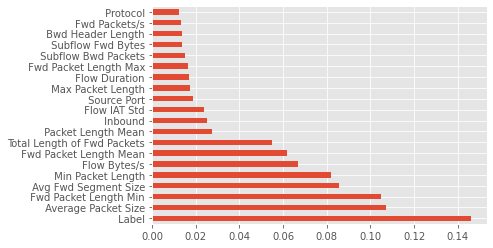

In [15]:
(pd.Series(model.feature_importances_, index=df.columns)
   .nlargest(20)
   .plot(kind='barh'))

In [16]:
import seaborn as sns


We have below variables which are higly correlated > 0.8 which will cause real problem, to fix it we will be performing PCA



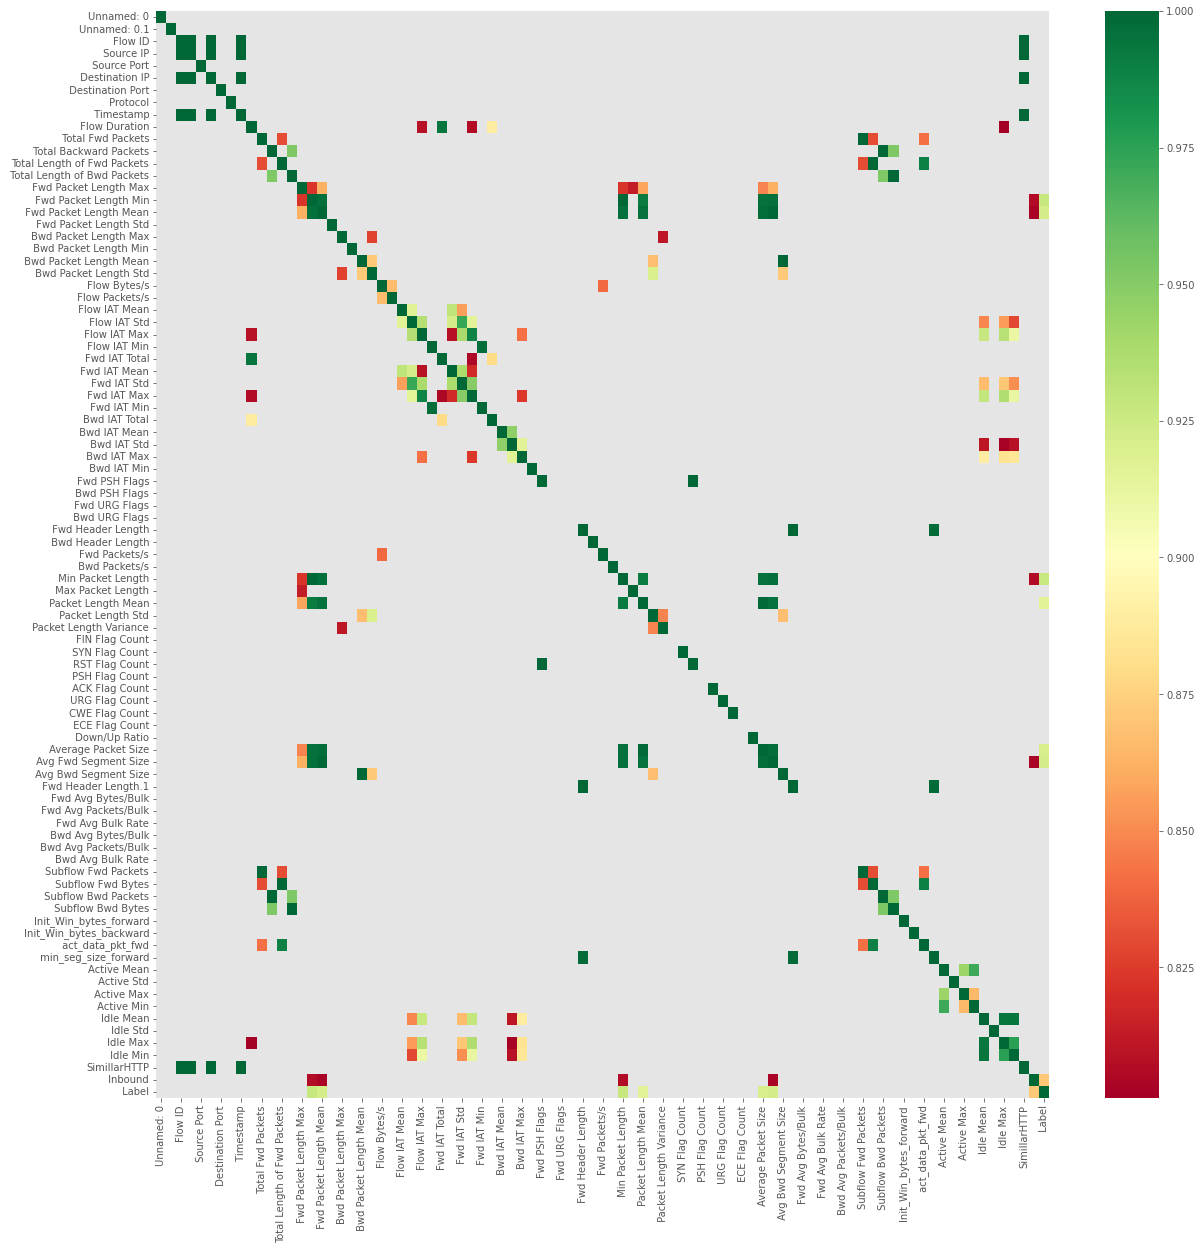

In [17]:
corrmat = df.corr()
top_corr_features = corrmat[corrmat>=.8]
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(top_corr_features,cmap="RdYlGn")
        

In [18]:
corre = df.corr()


In [19]:
cor_target = abs(df[" Label"])


In [20]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

4970721    1
279629     1
4224884    1
3165795    1
1243074    1
          ..
4106186    1
4529532    1
3337955    1
3669870    1
1227494    1
Name:  Label, Length: 8000, dtype: int64

In [21]:
df.corr()


,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
Unnamed: 0,1.000000,0.216603,-0.020539,-0.020539,-0.187769,-0.020539,0.104227,0.144303,-0.020539,-0.074363,...,-0.015085,-0.041158,-0.042932,-0.081342,-0.029042,-0.081680,-0.079667,-0.020539,0.184163,0.213000
Unnamed: 0.1,0.216603,1.000000,-0.172741,-0.172741,-0.343965,-0.172741,0.188638,0.371766,-0.172741,-0.187365,...,-0.056004,-0.077362,-0.056280,-0.146283,-0.056247,-0.147480,-0.142713,-0.172741,0.360464,0.431954
Flow ID,-0.020539,-0.172741,1.000000,1.000000,0.013893,1.000000,0.003298,0.046033,1.000000,-0.002789,...,0.016984,0.018656,0.016562,0.006401,-0.010175,0.004932,0.007894,1.000000,0.016552,0.013441
Source IP,-0.020539,-0.172741,1.000000,1.000000,0.013893,1.000000,0.003298,0.046033,1.000000,-0.002789,...,0.016984,0.018656,0.016562,0.006401,-0.010175,0.004932,0.007894,1.000000,0.016552,0.013441
Source Port,-0.187769,-0.343965,0.013893,0.013893,1.000000,0.013893,-0.627447,-0.459210,0.013893,0.247809,...,0.046485,0.109871,0.103123,0.227489,0.037399,0.223211,0.228167,0.013893,-0.942626,-0.830385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Max,-0.081680,-0.147480,0.004932,0.004932,0.223211,0.004932,-0.152915,-0.270097,0.004932,0.801116,...,0.201117,0.210249,0.149366,0.993368,0.381163,1.000000,0.975527,0.004932,-0.238757,-0.218197
Idle Min,-0.079667,-0.142713,0.007894,0.007894,0.228167,0.007894,-0.149449,-0.260872,0.007894,0.780788,...,0.187517,0.199120,0.145134,0.994080,0.172772,0.975527,1.000000,0.007894,-0.233418,-0.213742
SimillarHTTP,-0.020539,-0.172741,1.000000,1.000000,0.013893,1.000000,0.003298,0.046033,1.000000,-0.002789,...,0.016984,0.018656,0.016562,0.006401,-0.010175,0.004932,0.007894,1.000000,0.016552,0.013441
Inbound,0.184163,0.360464,0.016552,0.016552,-0.942626,0.016552,0.655351,0.566922,0.016552,-0.285265,...,-0.083129,-0.117778,-0.088328,-0.237975,-0.081825,-0.238757,-0.233418,0.016552,1.000000,0.871552


Here we had to use PCA after standrizing the data and get over .95 of the explained varaince



In [22]:

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_scaled)
reduced = pca.transform(X_scaled)

total length =  2281
BENIGN =  1623
DrDoS_NTP =  658


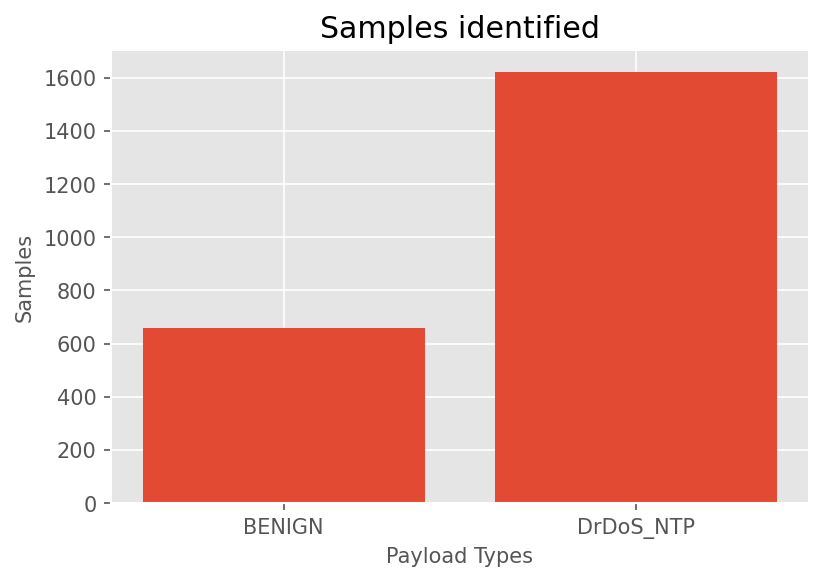

In [24]:
checking_occurences = [X for X in y_test if X == 1]
print("total length = ",len(y_test))
print("BENIGN = ",len(checking_occurences))
print("DrDoS_NTP = ", (len(y_test) - len(checking_occurences)))
n = len(y_test) - len(checking_occurences)
a = len(checking_occurences)

label = ['BENIGN', 'DrDoS_NTP']
samples = [n, a]

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * 1.5

# this is for plotting purpose
index = np.arange(len(label))
plt.bar(index, samples)
plt.xlabel('Payload Types', fontsize=10)
plt.ylabel('Samples', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=0)
plt.title('Samples identified')
plt.show()

In [25]:

from sklearn.ensemble import IsolationForest
iForest = IsolationForest()

In [26]:
df[' Label'].value_counts()


1    8000
0    3402
Name:  Label, dtype: int64

In [27]:
iForest.fit(X_train)


IsolationForest()

In [ ]:
#scores = iForest.decision_function(X_val)


In [ ]:
#scores


In [48]:
#plt.figure(figsize=(12,8))
#plt.hist(scores, bins=100);

In [29]:
cutoff = -0.07


In [30]:
df['log2_value1'] = np.log2(df[' Flow Duration'])
df['log2_value2'] = np.log2(df[' Source IP'])
df['log2_value3'] = np.log2(df[' Destination IP'])
df['log2_value3'] = np.log2(df[' Destination Port'])
df['log2_value3'] = np.log2(df[' Protocol'])

print(df)

         Unnamed: 0  Unnamed: 0.1  Flow ID   Source IP   Source Port  \
27               27           123     2558        2558         59099   
31               31            23    14446       14446         59102   
53               53           126     2891        2891             0   
93               93            91    27184       27184         59155   
94               94            87    26739       26739         59131   
...             ...           ...      ...         ...           ...   
4106186     4106186         21334    12597       12597           923   
4529532     4529532         13773     4195        4195           822   
3337955     3337955         22314    13686       13686           512   
3669870     3669870         12310     2571        2571           650   
1227494     1227494         14922     5472        5472           935   

          Destination IP   Destination Port   Protocol   Timestamp  \
27                  2558                 80          6        255

divide by zero encountered in log2


In [35]:
from tensorflow import keras
import numpy as np
import datetime
import time
x=pd.DataFrame(reduced)
x = x.values
sample = x.shape[0]
features = x.shape[1]
#Train: convert 2D to 3D for input RNN
x_train = np.reshape(x,(sample,features,1)) #shape  = (125973, 18, 1)
#Test: convert 2D to 3D for input RNN
x_test=pd.DataFrame(X_test)
x_test = x_test.values
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [36]:
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding,SimpleRNN, GRU,Activation,Flatten
from sklearn.metrics import (precision_score, recall_score,confusion_matrix,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger
from tensorflow.keras import callbacks
import scikitplot as skplt

### RNN

In [37]:

batch_size = 32
model_rnn = Sequential()
model_rnn.add(SimpleRNN(8,input_shape=(features,x_train.shape[2]), return_sequences=True))  
model_rnn.add(Dropout(0.1))
model_rnn.add(SimpleRNN(8, return_sequences=False))  
model_rnn.add(Dropout(0.1))
model_rnn.add(Dense(1))
model_rnn.add(Activation('sigmoid'))

In [38]:

model_rnn.compile(loss='binary_crossentropy',optimizer='Adadelta',metrics=['acc'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) 
Echeckpointer = callbacks.ModelCheckpoint(filepath="RNN-checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
model_rnn.fit(x_train, y, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test),callbacks=[es])
model_rnn.save("best_model_rnn.hdf5")

Epoch 1/10
357/357 [==============================] - 8s 16ms/step - loss: 0.7238 - acc: 0.4872 - val_loss: 0.6614 - val_acc: 0.6037
Epoch 2/10
357/357 [==============================] - 6s 16ms/step - loss: 0.7245 - acc: 0.4843 - val_loss: 0.6570 - val_acc: 0.6089
Epoch 3/10
357/357 [==============================] - 5s 15ms/step - loss: 0.7223 - acc: 0.4896 - val_loss: 0.6524 - val_acc: 0.6138
Epoch 4/10
357/357 [==============================] - 5s 15ms/step - loss: 0.7196 - acc: 0.4964 - val_loss: 0.6476 - val_acc: 0.6168
Epoch 5/10
357/357 [==============================] - 5s 15ms/step - loss: 0.7183 - acc: 0.4974 - val_loss: 0.6427 - val_acc: 0.6238
Epoch 6/10
357/357 [==============================] - 5s 15ms/step - loss: 0.7123 - acc: 0.5037 - val_loss: 0.6376 - val_acc: 0.6278
Epoch 7/10
357/357 [==============================] - 6s 16ms/step - loss: 0.7073 - acc: 0.5192 - val_loss: 0.6326 - val_acc: 0.6339
Epoch 8/10
357/357 [==============================] - 6s 17ms/step - 

In [39]:
scores = model_rnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.32%


In [40]:
y_pred_rnn = model_rnn.predict_classes(x_test)
y_probs_rnn=model_rnn.predict_proba(x_test)
np.savetxt('rnn_predictions.txt', np.transpose(np.concatenate((y_test.reshape((y_test.size, 1)),y_pred_rnn), axis=1)), fmt='%01d')
np.savetxt('rnn_prob_predictions.txt', np.around(np.transpose(y_probs_rnn),decimals=5), fmt='%.5f')

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


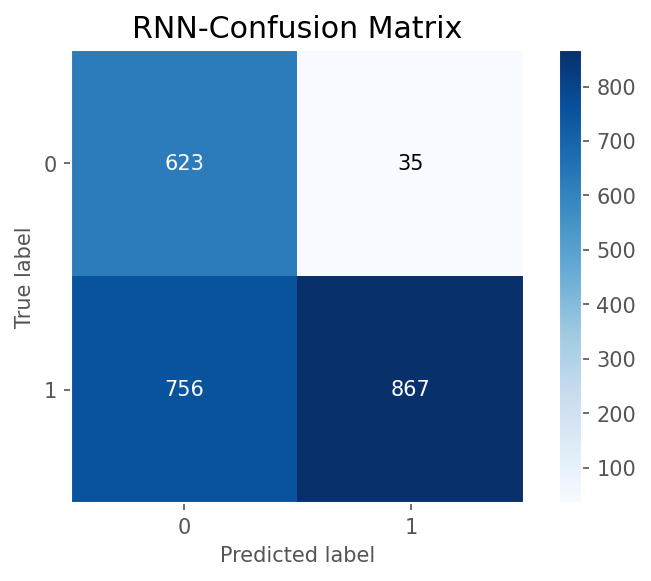

In [41]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rnn)
plt.title("RNN-Confusion Matrix")
plt.rcParams['figure.figsize']=(5,4)
plt.show()

In [42]:
batch_size=32


### LSTM

In [43]:
model_lstm = Sequential()
model_lstm.add(LSTM(8,input_shape=(features,x_train.shape[2]), return_sequences=True))  
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(8, return_sequences=False))  
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.add(Activation('sigmoid'))

In [44]:

model_lstm.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['acc'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stoppoing


model_lstm.fit(x_train, y, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test),callbacks=[es])
model_lstm.save("lstm_model_lstm.hdf5")

Epoch 1/10
357/357 [==============================] - 18s 34ms/step - loss: 0.6094 - acc: 0.7012 - val_loss: 0.5583 - val_acc: 0.7115
Epoch 2/10
357/357 [==============================] - 11s 30ms/step - loss: 0.5474 - acc: 0.7221 - val_loss: 0.5398 - val_acc: 0.7593
Epoch 3/10
357/357 [==============================] - 11s 30ms/step - loss: 0.2161 - acc: 0.9568 - val_loss: 0.7495 - val_acc: 0.7492
Epoch 4/10
357/357 [==============================] - 11s 29ms/step - loss: 0.1427 - acc: 0.9678 - val_loss: 0.8733 - val_acc: 0.7479
Epoch 5/10
357/357 [==============================] - 11s 31ms/step - loss: 0.1245 - acc: 0.9703 - val_loss: 0.9711 - val_acc: 0.7448
Epoch 6/10
357/357 [==============================] - 10s 29ms/step - loss: 0.1155 - acc: 0.9718 - val_loss: 1.0382 - val_acc: 0.7448
Epoch 7/10
357/357 [==============================] - 10s 29ms/step - loss: 0.1146 - acc: 0.9706 - val_loss: 1.1031 - val_acc: 0.7413
Epoch 8/10
357/357 [==============================] - 11s 30ms

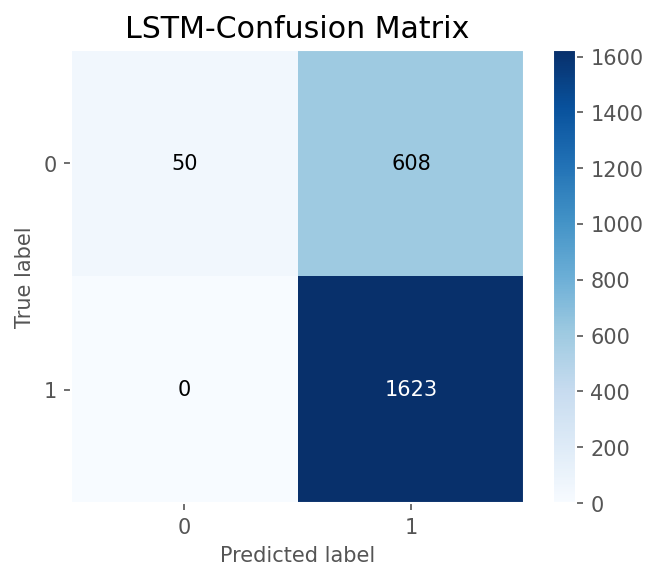

In [45]:
y_pred_lstm = model_lstm.predict_classes(x_test)
y_probs_lstm=model_lstm.predict_proba(x_test)
np.savetxt('lstm_predictions.txt', np.transpose(np.concatenate((y_test.reshape((y_test.size, 1)),y_pred_lstm), axis=1)), fmt='%01d')
np.savetxt('lstm_prob_predictions.txt', np.around(np.transpose(y_probs_lstm),decimals=5), fmt='%.5f')


######Plot confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred_lstm)
plt.title("LSTM-Confusion Matrix")
plt.show()

In [46]:
scores = model_lstm.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.35%


In [47]:
accuracy = accuracy_score(y_test, y_pred_lstm)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred_lstm)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred_lstm)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_lstm)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_lstm)
print("Recall_score:",rs)

accuracy: 0.7334502411223148
f1-acore: 0.8422418266735859
confusion matrix:
 [[  50  608]
 [   0 1623]]
Precision: 0.7274764679515913
Recall_score: 1.0
